In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
train_data = pd.read_csv("type1_train.csv")
valid_data = pd.read_csv("type1_valid.csv")
test_data = pd.read_csv("type1_test.csv")

In [17]:
train_data = pd.read_csv("type2_train.csv")
valid_data = pd.read_csv("type2_valid.csv")
test_data = pd.read_csv("type2_test.csv")

In [18]:
categorical = ['Sex','HTN','DM']

In [19]:
for feature in categorical:
    le = LabelEncoder()
    le = le.fit(train_data[feature])
    train_data[feature] = le.transform(train_data[feature])
for feature in categorical:
    le = LabelEncoder()
    le = le.fit(valid_data[feature])
    valid_data[feature] = le.transform(valid_data[feature])

for feature in categorical:
    le = LabelEncoder()
    le = le.fit(test_data[feature])
    test_data[feature] = le.transform(test_data[feature])

In [20]:
man_train = train_data[train_data['Sex'] == 1]
woman_train = train_data[train_data['Sex'] == 0]

man_valid = valid_data[valid_data['Sex'] == 1]
woman_valid = valid_data[valid_data['Sex'] == 0]

man_test = test_data[test_data['Sex'] == 1]
woman_test = test_data[test_data['Sex'] == 0]

In [21]:
x_train = train_data.drop(['CarotidUS'], axis=1)
y_train = train_data['CarotidUS']
x_valid = valid_data.drop(['CarotidUS'], axis=1)
y_valid = valid_data['CarotidUS']
x_test = test_data.drop(['CarotidUS'], axis=1)
y_test = test_data['CarotidUS']

In [28]:
x_train = woman_train.drop(['CarotidUS'], axis=1)
y_train = woman_train['CarotidUS']
x_valid = woman_valid.drop(['CarotidUS'], axis=1)
y_valid = woman_valid['CarotidUS']
x_test = woman_test.drop(['CarotidUS'], axis=1)
y_test = woman_test['CarotidUS']

In [7]:
params = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [3, 5, 7], # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001], # Learning rate
}

In [29]:
best_acc = 0
best_params = {}
for n_estimators in params['n_estimators']:
    for max_depth in params['max_depth']:
        for learning_rate in params['learning_rate']:
            xgb_clf = xgb.XGBClassifier(n_estimators = n_estimators, max_depth=max_depth, learning_rate=learning_rate, max_features=7)
            xgb_clf.fit(x_train, y_train)
            pred = xgb_clf.predict(x_valid)
            print('n_estimators: {0}, max_depth: {1}, learning_rate: {2}'.format(n_estimators, max_depth, learning_rate))
            print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}'.format(accuracy_score(y_valid, pred), precision_score(y_valid, pred), recall_score(y_valid, pred), f1_score(y_valid, pred)))

            if accuracy_score(y_valid, pred) > best_acc:
                best_acc = accuracy_score(y_valid, pred)
                best_params['n_estimators'] = n_estimators
                best_params['max_depth'] = max_depth
                best_params['learning_rate'] = learning_rate

print('best params: {0}'.format(best_params))
print('best accuracy: {0:.4f}'.format(best_acc))
xgb_clf = xgb.XGBClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'], max_features=7)
xgb_clf.fit(x_train, y_train)
pred = xgb_clf.predict(x_test)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}'.format(accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred), f1_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

[01:39:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_features" } are not used.

n_estimators: 100, max_depth: 3, learning_rate: 0.1
accuracy: 0.7780, precision: 0.6905, recall: 0.2479, f1: 0.3648
[01:39:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_features" } are not used.

n_estimators: 100, max_depth: 3, learning_rate: 0.01
accuracy: 0.7714, precision: 0.8824, recall: 0.1282, f1: 0.2239
[01:39:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_features" } are not used.

n_estimators: 100, max_depth: 3, learning_rate: 0.001
accuracy: 0.7868, precision: 0.7778, recall: 0.2393, f1: 0.3660
[01:39:02] WARNING: C:\buildkite-agent\buil

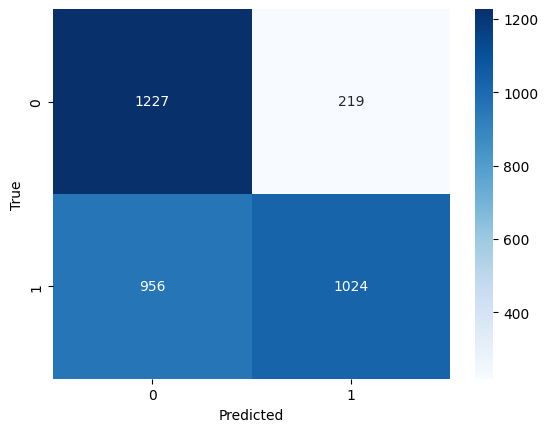

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Feature Importances:
[0.53706264 0.         0.0537813  0.02442585 0.0178731  0.03133314
 0.0201696  0.02501698 0.02061858 0.03545966 0.02972755 0.03287544
 0.0207652  0.03247415 0.02806667 0.03281599 0.03196726 0.02556682]

Age: 0.537
Sex: 0.000
HTN: 0.054
DM: 0.024
HDL: 0.018
LDL: 0.031
Triglyceride: 0.020
Cholesterol: 0.025
HOMA: 0.021
Insulin: 0.035
Ferritin: 0.030
HbA1C: 0.033
ESR: 0.021
Homocysteine: 0.032
Apolipoprotein A: 0.028
Apolipoprotein B: 0.033
Lp(a): 0.032
HS-CRP: 0.026
[0.53706264 0.         0.0537813  0.02442585 0.0178731  0.03133314
 0.0201696  0.02501698 0.02061858 0.03545966 0.02972755 0.03287544
 0.0207652  0.03247415 0.02806667 0.03281599 0.03196726 0.02556682]


<Axes: ylabel='Feature'>

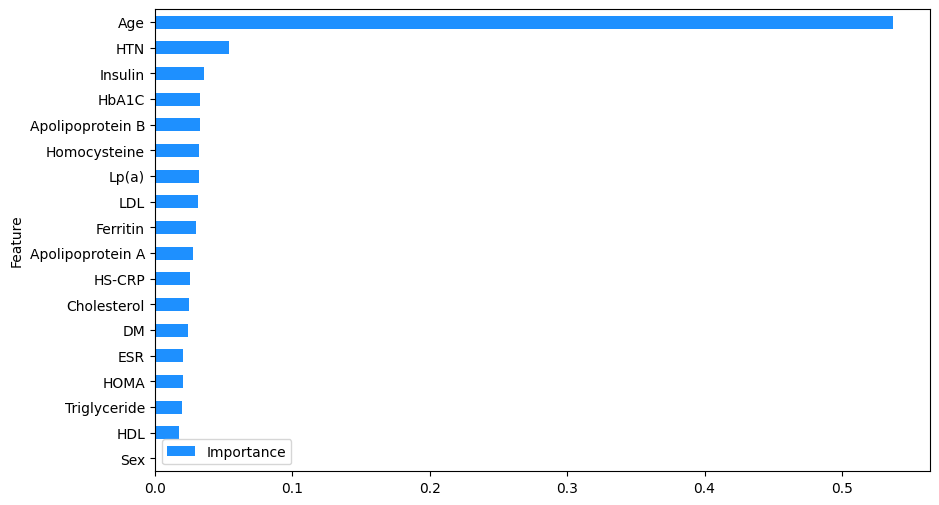

In [30]:
feature = x_test.columns.tolist()
print("Feature Importances:\n{0}\n".format(xgb_clf.feature_importances_))
for name, value in zip(train_data.columns, xgb_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
print(xgb_clf.feature_importances_)
feature_importance = pd.DataFrame({'Feature':feature,'Importance':xgb_clf.feature_importances_})
feature_importance.sort_values(by=['Importance'], ascending=True, inplace=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), color='dodgerblue')